# Genetic_algorithm_module과 preprocessing_module의 사용 예시


- 각 모듈에서 함수들을 import합니다.
    - preprocessing_module(이하 pp모듈)은 모든 함수를 import하면 좋습니다.
    - Genetic_algorithm_module(이하 ga모듈)에서는 genetic_algorithm 함수만 필요합니다.

In [1]:
from preprocessing_module import *
from Genetic_algorithm_module import genetic_algorithm

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir('/Users/yongwan89/PycharmProjects/dataset')

- pp모듈의 함수이름을 보여주는 함수를 정의합니다. (그대로 복사해서 쓰면 편하게 함수 이름만 볼 수 있습니다.)

In [3]:
def functions_list():
    '''preprocessing_module 의 함수 list 출력'''
    from inspect import getmembers, isfunction
    import preprocessing_module
    
    return [o[0] for o in getmembers(preprocessing_module) if isfunction(o[1])]

In [4]:
functions_list()

['Remove_outliers',
 'categ_or_contin',
 'check_skew',
 'corr_btw_x_y_VS_fixed_col',
 'corr_heatmap',
 'count_category',
 'features_Boxplot',
 'features_vs_frequency',
 'features_vs_label',
 'functions_list',
 'one_feature_vs_freqency',
 'rmse',
 'rowXcol_for_subfig',
 'skew',
 'test_for_transf',
 'x_vs_y_with_fixed_col']

- genetic_algorithm에서 사용할 머신을 import해옵니다.

In [2]:
#데이터 불러오기
train = pd.read_csv("house_train.csv", engine = 'python')

In [7]:
# date'는 데이터가 str이라서 편의상 제거.
train = train.drop(columns=['date']) 

## 상관관계 조사 : corr_heatmap

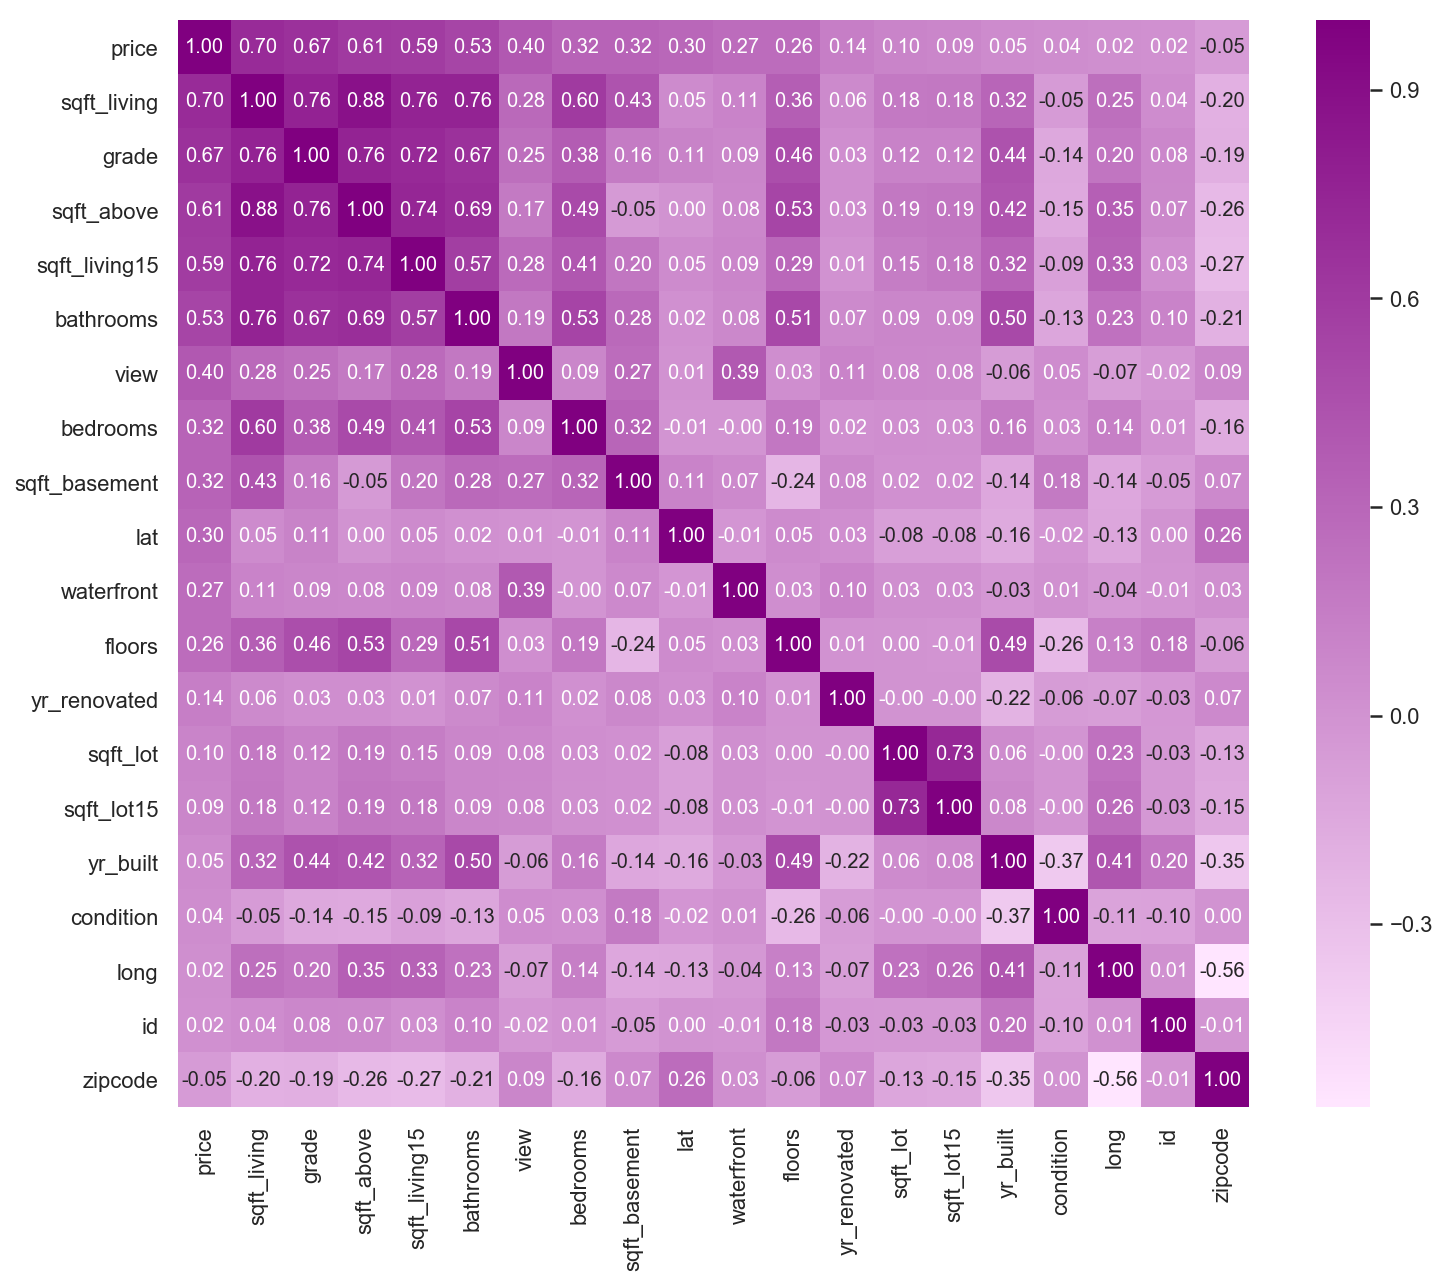

In [44]:
corr_heatmap(train, 'price')

## Categorical variable과 Continuous variable을 분류 : 

In [45]:
cont_ls = categ_or_contin(train.drop(columns=['price']), criterion=15,cat_or_cont=True) # continuous variable출력
# 'price'가 본 데이터의 label

- categorical variables :  ['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade'] 
- continuous variables :  ['id', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [46]:
cat_ls = categ_or_contin(train, criterion=15,cat_or_cont=False, print_col=False) # categorical variable출력
cat_ls

['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

## Categorical variable의 카테고리 종류와 분포 조사 : count_category

In [15]:
count_category(train,['grade'])

,category,grade
0,7,6228
1,8,4207
2,9,1855
3,6,1406
4,10,781
5,11,288
6,5,174
7,12,61
8,4,23
9,13,9


- 변수를 ordering할수 있습니다.

In [16]:
count_category(train,['grade'], sort_category=True)

,category,grade
0,1,1
1,3,2
2,4,23
3,5,174
4,6,1406
5,7,6228
6,8,4207
7,9,1855
8,10,781
9,11,288


- 여러 변수를 대상으로 수행할 수 도 있습니다.
    - 카테고리 갯수가 적은 변수에는 NaN으로 채워집니다.

In [17]:
count_category(train,['grade','floors']) 

,category,grade,category,floors
0,7,6228,1.0,7361.0
1,8,4207,2.0,5810.0
2,9,1855,1.5,1330.0
3,6,1406,3.0,417.0
4,10,781,2.5,113.0
5,11,288,3.5,4.0
6,5,174,NaN,NaN
7,12,61,NaN,NaN
8,4,23,NaN,NaN
9,13,9,NaN,NaN


## Categorical variable 분포 boxplot으로 조사 : features_Boxplot

그래프가 1X1행렬로 그려집니다.


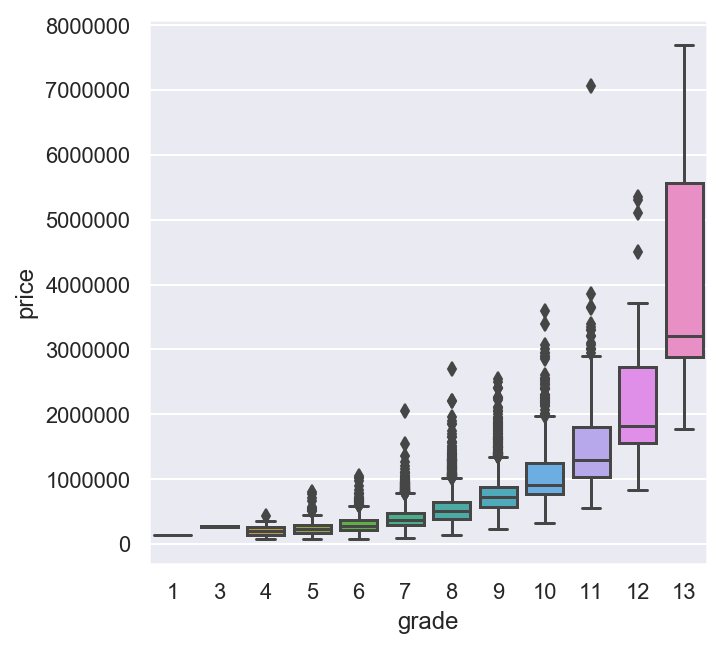

In [19]:
features_Boxplot(train,'price',['grade'],figsize_tuple_=(5,5))

In [28]:
- 모든 categorical variable을 대상으로 boxplot을 그릴 수 있습니다.
    - 가장 적절한 그래프의 행과 열을 자동으로 계산하여서 그림을 보여줍니다.

SyntaxError: invalid syntax (<ipython-input-28-ee9d57714a38>, line 1)

그래프가 2X3행렬로 그려집니다.


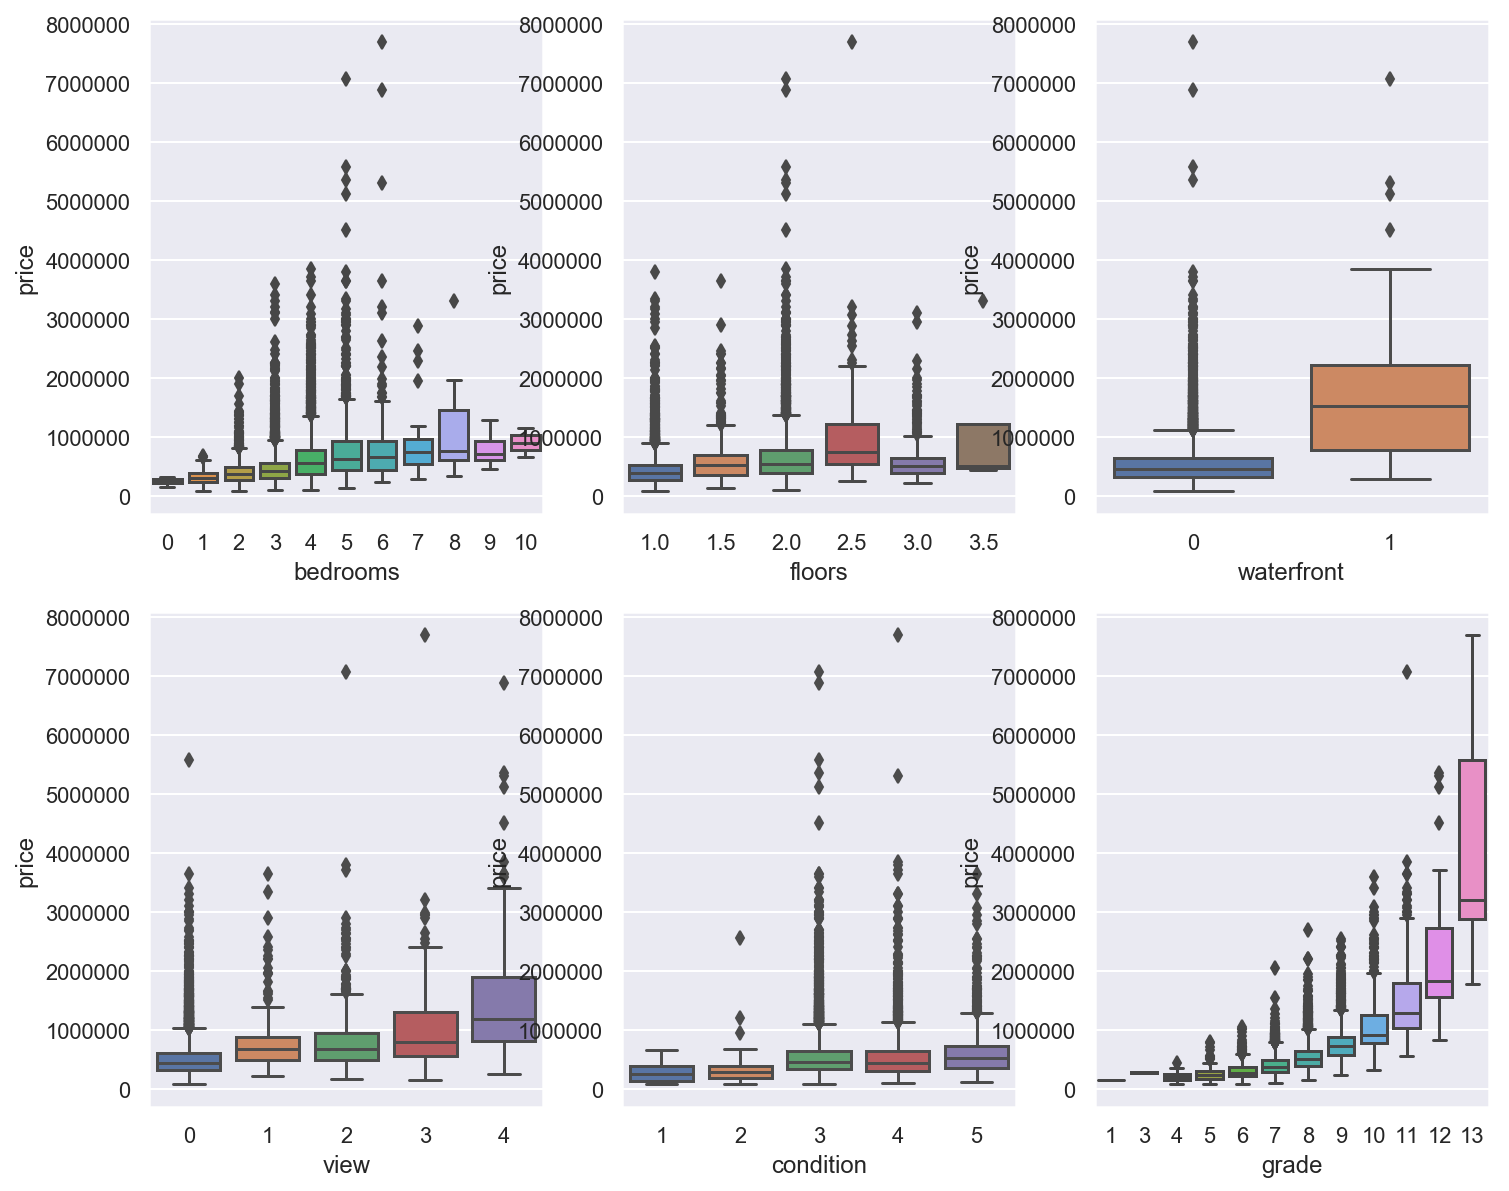

In [27]:
features_Boxplot(train,'price',cat_ls)

## 하나의 feature에 대한 빈번도 분포 조사 : one_feature_vs_freqency
    - 왜도, 평균, 표준편차까지 보여줍니다.

Skewness: 1.492472


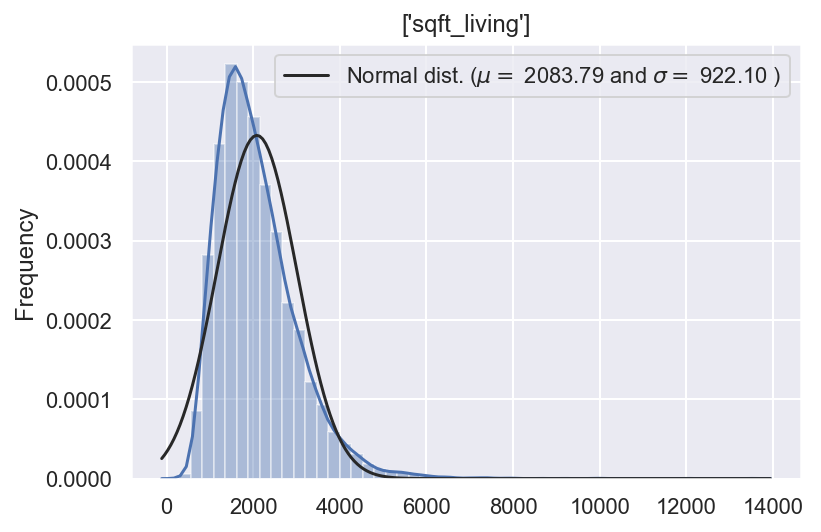

In [20]:
one_feature_vs_freqency(train,['sqft_living'])

## 다수의 feature에 대한 빈번도 분포 동시 조사 : features_vs_freqency

그래프가 4X5행렬로 그려집니다.


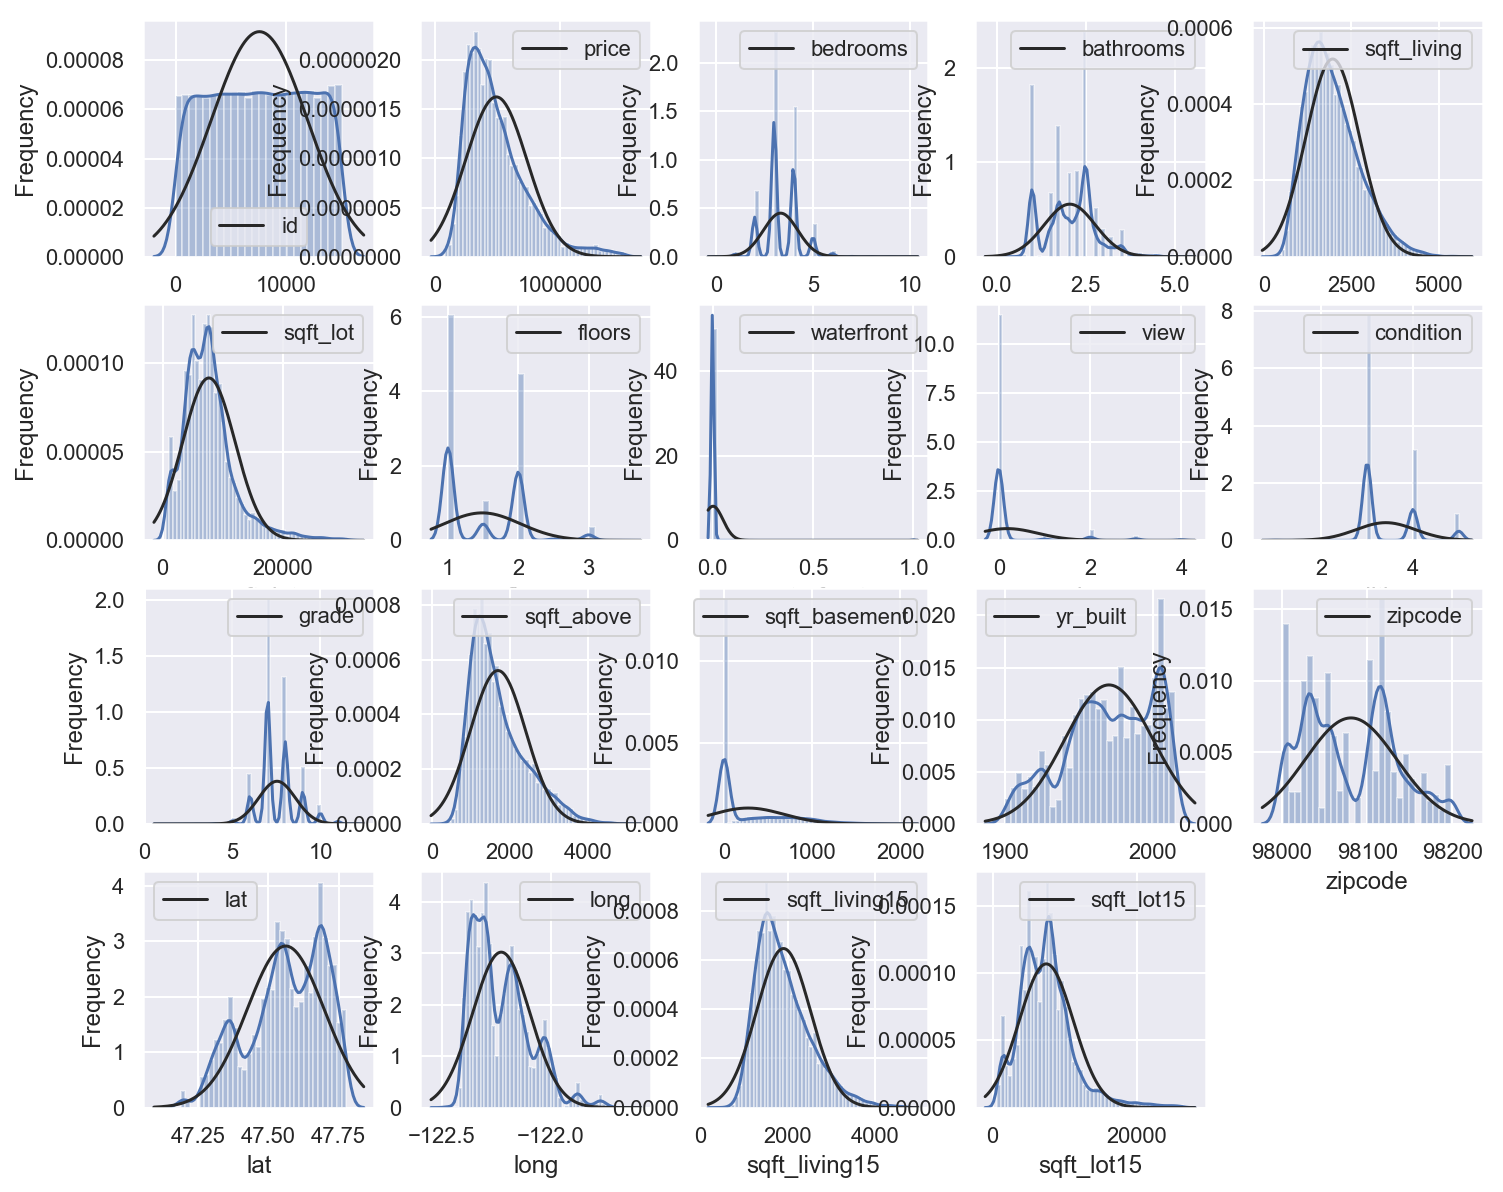

In [14]:
features_vs_frequency(train)

## freature vs label 그래프(1개 혹은 다수) 그리기 : features_vs_label

그래프가 1X1행렬로 그려집니다.


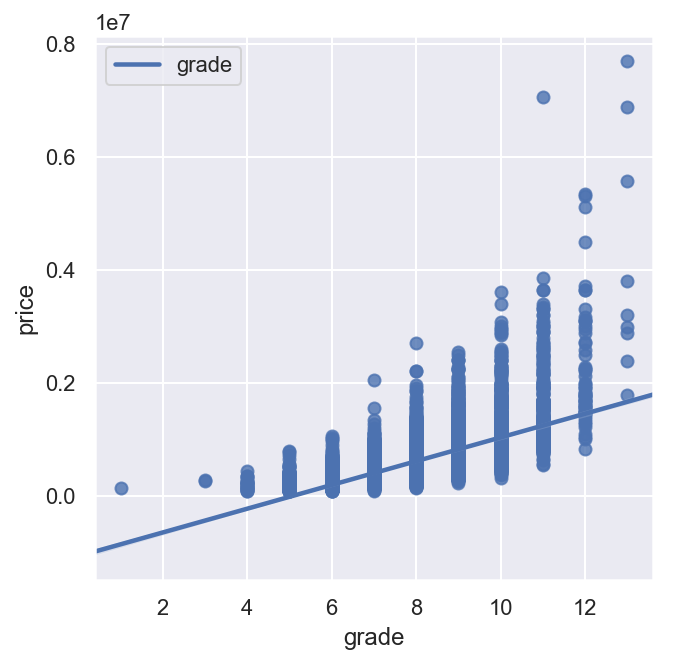

In [30]:
features_vs_label(train,'price',['grade'], figsize_tuple_=(5,5))

그래프가 4X4행렬로 그려집니다.


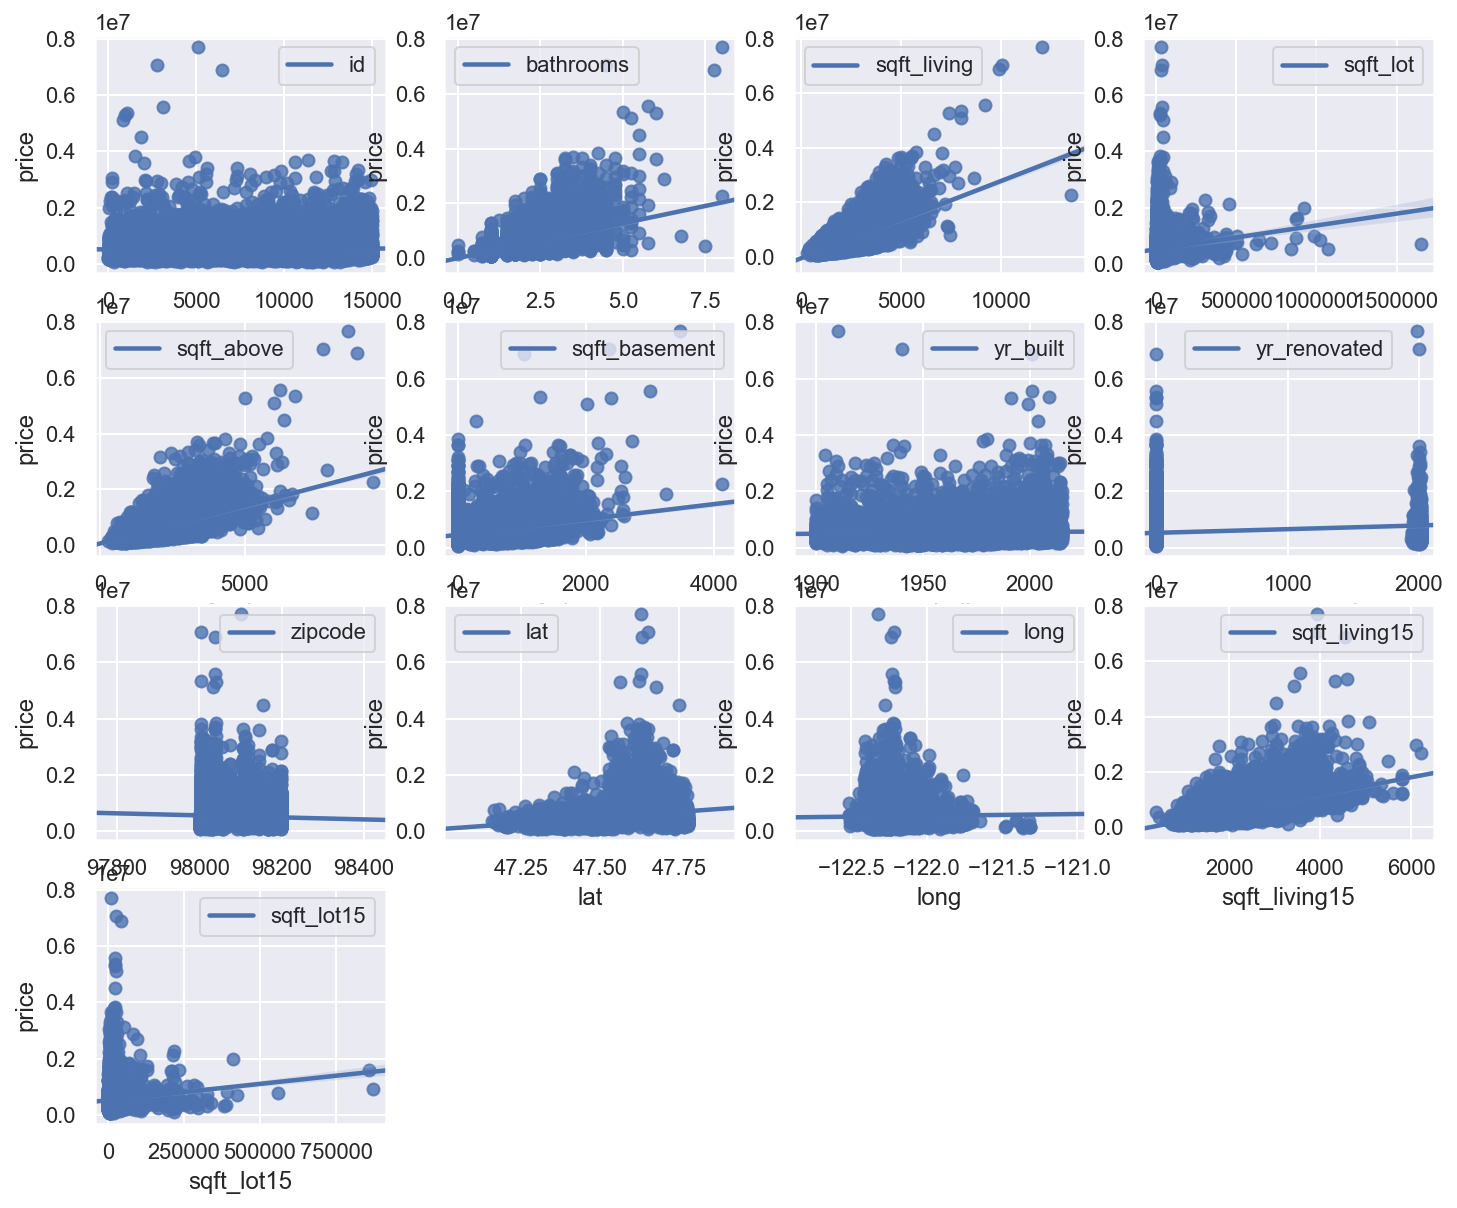

In [47]:
features_vs_label(train,'price',cont_ls)

## skewness를 기준으로 치우침있는 연속형 features 확인 : check_skew

In [48]:
check_skew(train,column_list_=True, print_col_=False, skewness=1.5) #기준 왜도 = 1.5

Columns ['id', 'price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']에서 
 skewness가 1.5보다 높은 columns은 ['price', 'sqft_lot', 'sqft_basement', 'yr_renovated', 'sqft_lot15']이다.



## feature 변환할때 변환에따른 변화 그래프를 간단하게 확인 : test_for_transf

Skewness: 4.290252


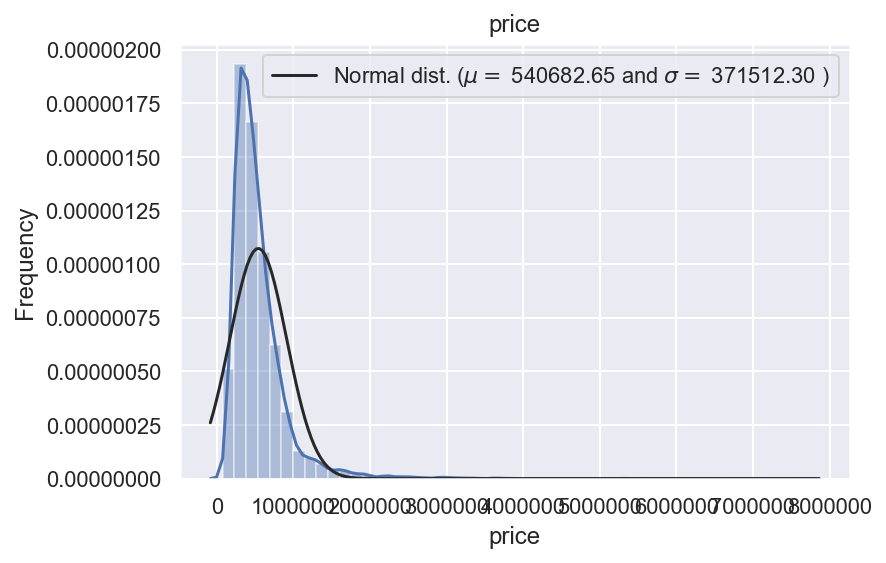

In [52]:
one_feature_vs_freqency(train,'price')

- 내장되어있는 함수는 그 이름을 불러오면 되고, 내장되어있지 않은 함수는 lambda 함수로 입력하면 된다.

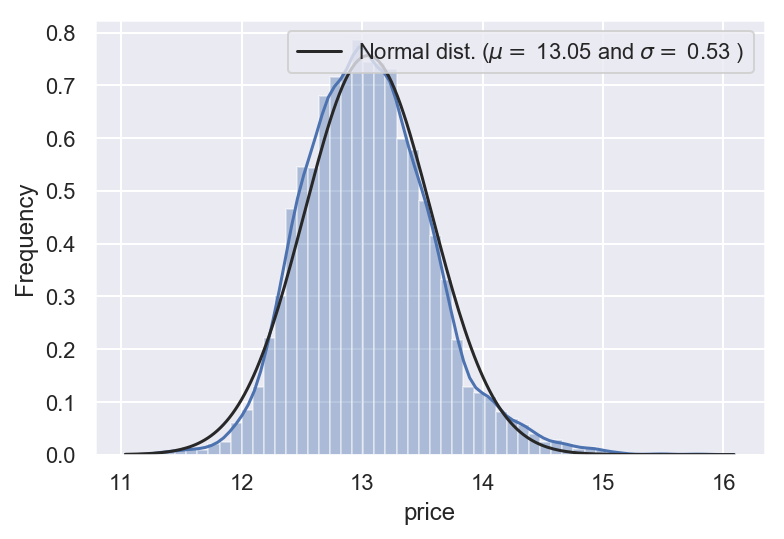

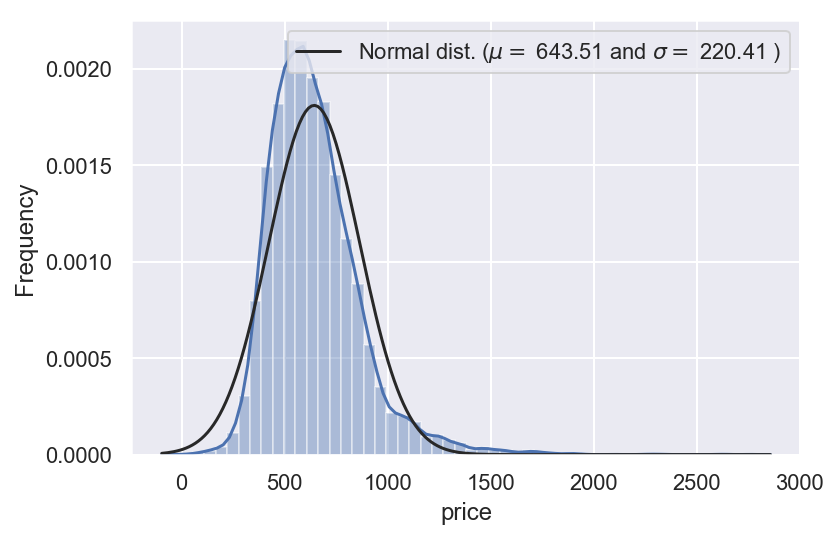

In [59]:
test_for_transf(train, 'price' ,['log(x)',lambda x : (x - train['price'].min())**(1/2)])

## 이상치 제거 : Remove_outliers
- IQR기준으로 제거, 수치 변경 가능

- 각 특징에 있는 이상치 갯수를 볼 수 있다.

In [8]:
Remove_outliers(train, dropna_inplace=False, criterion_Q1=0.15, criterion_Q3=0.85)

,# of NAN
id,0
price,348
bathrooms,18
sqft_living,70
sqft_lot,1155
sqft_above,57
sqft_basement,48
yr_built,0
yr_renovated,15035
zipcode,0


- 실제로 제거 할 수 있다.

In [12]:
train = Remove_outliers(train.drop(columns = ['yr_renovated']), dropna_inplace=True, criterion_Q1=0.15, criterion_Q3=0.85)

Outliers are completely removed. Length is redeced from 15035 to 13391


In [13]:
train.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
13386,15030,610685.0,4,2.50,2520.0,6023.0,2.0,0,0,3,9,2520.0,0.0,2014,98056,47.5137,-122.167,2520.0,6023.0
13387,15031,1007500.0,4,3.50,3510.0,7200.0,2.0,0,0,3,9,2600.0,910.0,2009,98136,47.5537,-122.398,2050.0,6200.0
13388,15032,360000.0,3,2.50,1530.0,1131.0,3.0,0,0,3,8,1530.0,0.0,2009,98103,47.6993,-122.346,1530.0,1509.0
13389,15033,400000.0,4,2.50,2310.0,5813.0,2.0,0,0,3,8,2310.0,0.0,2014,98146,47.5107,-122.362,1830.0,7200.0
13390,15034,325000.0,2,0.75,1020.0,1076.0,2.0,0,0,3,7,1020.0,0.0,2008,98144,47.5941,-122.299,1020.0,1357.0


## 하나의 categorical variable의 category에 따른 다른 특징과 라벨 그래프 : x_vs_y_with_fixed_col

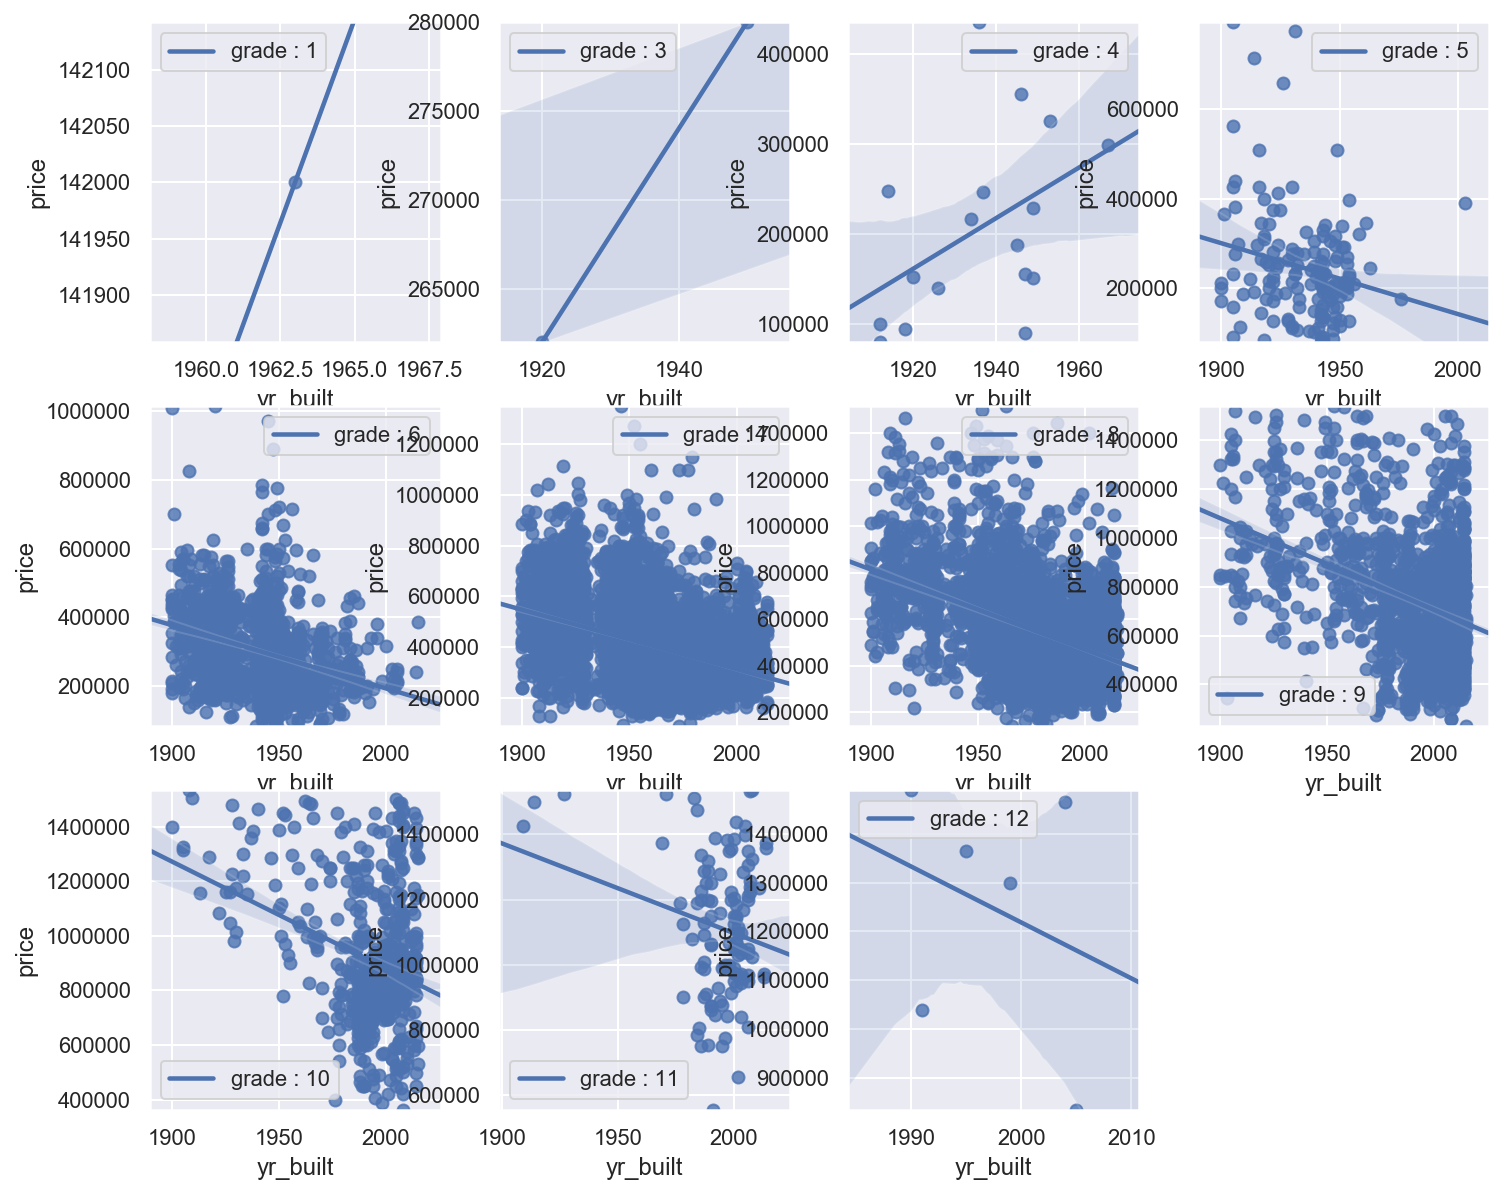

In [17]:
x_vs_y_with_fixed_col(train,'yr_built', 'price' ,'grade')

- 그래프의 y값 lower, upper bounds를 지정 가능. 

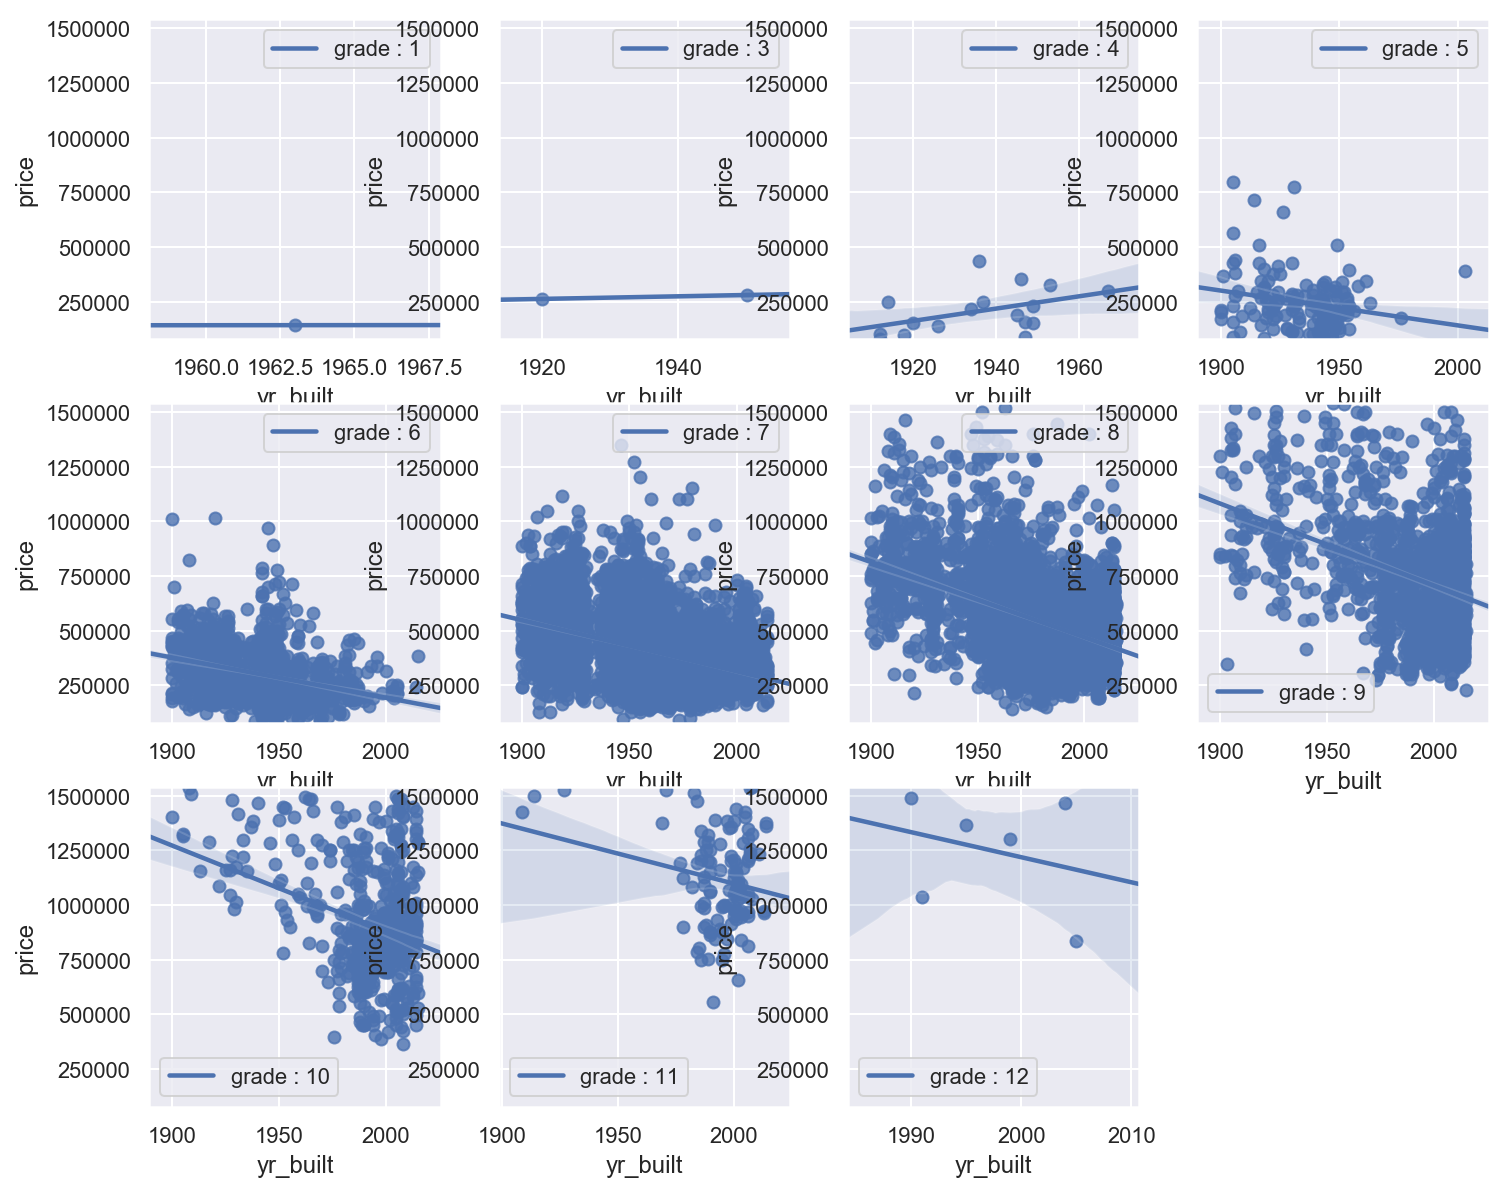

In [18]:
x_vs_y_with_fixed_col(train,'yr_built', 'price' ,'grade', train['price'].min(), train['price'].max())

## 카테고리에 따른 특징와 라벨의 상관관계 : corr_btw_x_y_VS_fixed_col

The correlation between yr_built and price in grade(1) is nan.
The correlation between yr_built and price in grade(3) is 1.0.
The correlation between yr_built and price in grade(4) is 0.45.
The correlation between yr_built and price in grade(5) is -0.22.
The correlation between yr_built and price in grade(6) is -0.32.
The correlation between yr_built and price in grade(7) is -0.42.
The correlation between yr_built and price in grade(8) is -0.46.
The correlation between yr_built and price in grade(9) is -0.38.
The correlation between yr_built and price in grade(10) is -0.31.
The correlation between yr_built and price in grade(11) is -0.21.
The correlation between yr_built and price in grade(12) is -0.28.


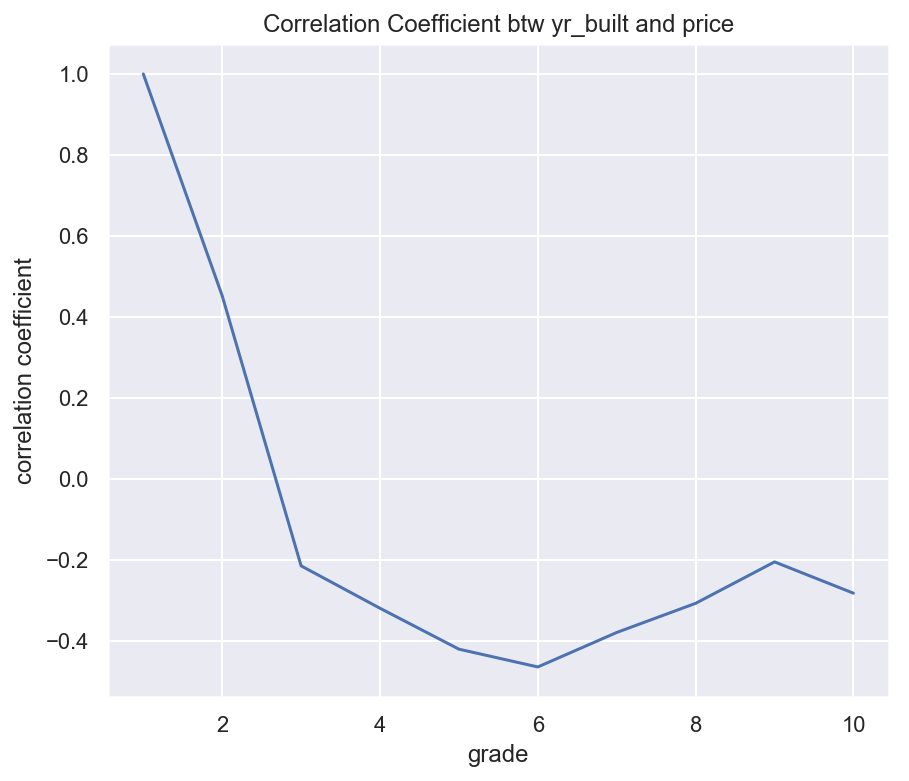

In [20]:
corr_btw_x_y_VS_fixed_col(train,'yr_built', 'price', 'grade')

## Feature selection : genetic_algorithm

In [21]:
from sklearn.ensemble import RandomForestRegressor

# 훈련 모델 객체화
random_forest = RandomForestRegressor(n_estimators= 120, min_samples_leaf= 1, max_depth= 20,random_state=42)

In [22]:
np.random.choice([True, False], (5, 10))

array([[ True,  True, False, False, False,  True, False, False, False,
        False],
       [False,  True,  True, False, False, False,  True, False, False,
        False],
       [ True, False, False, False, False,  True,  True, False, False,
        False],
       [False,  True,  True, False, False, False, False, False, False,
        False],
       [ True, False, False,  True, False, False, False,  True,  True,
         True]])

In [ ]:
test = genetic_algorithm(house[0], n=10, k=5, iter_number=10,fit_model = random_forest, \
                         label_in_df ='price', metric_scoring = 'r2')
                         
#Index(['date', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition','grade', 'sqft_above', 
# 'sqft_basement', 'zipcode', 'lat', 'long'],
 #     dtype='object') 0.8722855702330345         